In [43]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import roc_auc_score,roc_curve, precision_recall_curve, plot_confusion_matrix

In [2]:
df= pd.read_csv(r"D:\KETAN\AWS\Rice_Classification\artifacts\riceClassification.csv")
df.drop("id", axis = 1, inplace = True)
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1
...,...,...,...,...,...,...,...,...,...,...,...
18180,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,0
18181,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,0
18182,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,0
18183,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,0


In [3]:
df.shape

(18185, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             18185 non-null  int64  
 1   MajorAxisLength  18185 non-null  float64
 2   MinorAxisLength  18185 non-null  float64
 3   Eccentricity     18185 non-null  float64
 4   ConvexArea       18185 non-null  int64  
 5   EquivDiameter    18185 non-null  float64
 6   Extent           18185 non-null  float64
 7   Perimeter        18185 non-null  float64
 8   Roundness        18185 non-null  float64
 9   AspectRation     18185 non-null  float64
 10  Class            18185 non-null  int64  
dtypes: float64(8), int64(3)
memory usage: 1.5 MB


In [5]:
df.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000
mean,7036.492989,151.680754,59.807851,0.915406,7225.817872,94.132952,0.616653,351.606949,0.707998,2.599081,0.549079
std,1467.197150,12.376402,10.061653,0.030575,1502.006571,9.906250,0.104389,29.500620,0.067310,0.434836,0.497599
min,2522.000000,74.133114,34.409894,0.676647,2579.000000,56.666658,0.383239,197.015000,0.174590,1.358128,0.000000
25%,5962.000000,145.675910,51.393151,0.891617,6125.000000,87.126656,0.538530,333.990000,0.650962,2.208527,0.000000
50%,6660.000000,153.883750,55.724288,0.923259,6843.000000,92.085696,0.601194,353.088000,0.701941,2.602966,1.000000
75%,8423.000000,160.056214,70.156593,0.941372,8645.000000,103.559146,0.695664,373.003000,0.769280,2.964101,1.000000
max,10210.000000,183.211434,82.550762,0.966774,11008.000000,114.016559,0.886573,508.511000,0.904748,3.911845,1.000000


##  linearity

In [6]:
correlation = df.corr().tail(1)
correlation

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
Class,-0.816589,-0.147741,-0.917766,0.788636,-0.814214,-0.809361,-0.30344,-0.533274,-0.831759,0.832563,1.0


## VIF

In [7]:
vif_list = []
for i in range(df.shape[1]-1):
    vif = variance_inflation_factor(df.to_numpy(),i)
    vif_list.append(vif)

<AxesSubplot:>

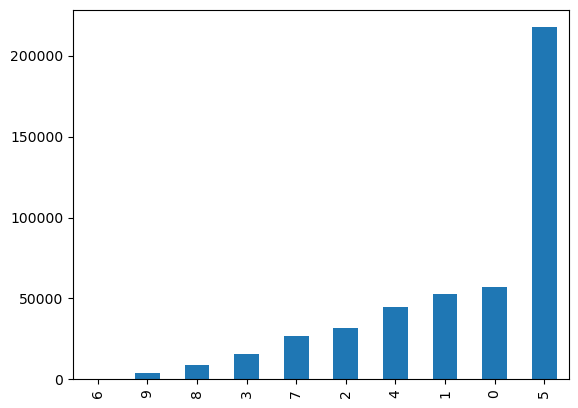

In [8]:
s1 = pd.Series(vif_list)
s1.sort_values().plot(kind = 'bar')

# model training

In [9]:
x= df.drop("Class", axis = 1 )
y= df["Class"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=10, stratify=y)
x_train

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation
13656,6764,138.959974,63.471578,0.889589,7020,92.801898,0.564419,335.550,0.754917,2.189326
10304,9398,158.060487,76.490519,0.875106,9638,109.388780,0.710678,386.581,0.790250,2.066406
9132,6841,168.058385,52.419048,0.950112,7008,93.328622,0.581421,371.298,0.623569,3.206056
10024,5300,150.125463,45.226795,0.953542,5409,82.147243,0.652709,327.945,0.619275,3.319392
1897,6031,146.156850,53.684437,0.930100,6187,87.629377,0.688470,332.701,0.684685,2.722518
...,...,...,...,...,...,...,...,...,...,...
9700,6946,171.520934,52.387963,0.952214,7107,94.042128,0.752220,371.023,0.634078,3.274052
13632,7695,148.117148,67.682125,0.889492,7952,98.982717,0.562171,358.518,0.752310,2.188423
9701,6617,167.391904,51.124196,0.952219,6805,91.787941,0.550866,364.839,0.624696,3.274221
16789,9684,169.855016,73.588708,0.901277,9859,111.040766,0.547583,399.184,0.763692,2.308167


In [10]:
x_test

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation
4694,5644,145.411877,50.017730,0.938980,5765,84.771245,0.516755,322.762,0.680820,2.907207
2426,5839,145.328879,52.602761,0.932195,6016,86.223232,0.524383,328.567,0.679674,2.762761
17808,6947,146.785384,60.906956,0.909849,7067,94.048897,0.580465,342.206,0.745473,2.409994
10645,4492,141.808800,41.305062,0.956640,4763,75.626662,0.713016,318.161,0.557642,3.433206
1201,6207,145.726045,55.071942,0.925841,6318,88.898807,0.522695,328.703,0.721912,2.646103
...,...,...,...,...,...,...,...,...,...,...
17415,7863,155.145949,65.901337,0.905301,8082,100.057396,0.572771,361.536,0.755953,2.354215
2806,5875,146.195932,52.378531,0.933616,6047,86.488625,0.599980,330.120,0.677445,2.791142
17409,7765,153.720575,65.302572,0.905281,7924,99.431912,0.838462,357.816,0.762135,2.353974
13394,8852,157.966289,72.440003,0.888654,9071,106.163630,0.575852,376.919,0.782988,2.180650


In [11]:
y_train

13656    0
10304    0
9132     1
10024    1
1897     1
        ..
9700     1
13632    0
9701     1
16789    0
7399     1
Name: Class, Length: 13638, dtype: int64

In [12]:
y_test

4694     1
2426     1
17808    0
10645    1
1201     1
        ..
17415    0
2806     1
17409    0
13394    0
2525     1
Name: Class, Length: 4547, dtype: int64

In [13]:
# testing
model = LogisticRegression()
model.fit(x_train, y_train)

C:\Users\Payal Gunjal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
y_pred = model.predict(x_test)

In [15]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
# classification report
cr = classification_report(y_test, y_pred)
print(cr)
# accuracy
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

[[2014   36]
 [  14 2483]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2050
           1       0.99      0.99      0.99      2497

    accuracy                           0.99      4547
   macro avg       0.99      0.99      0.99      4547
weighted avg       0.99      0.99      0.99      4547

0.9890037387288322


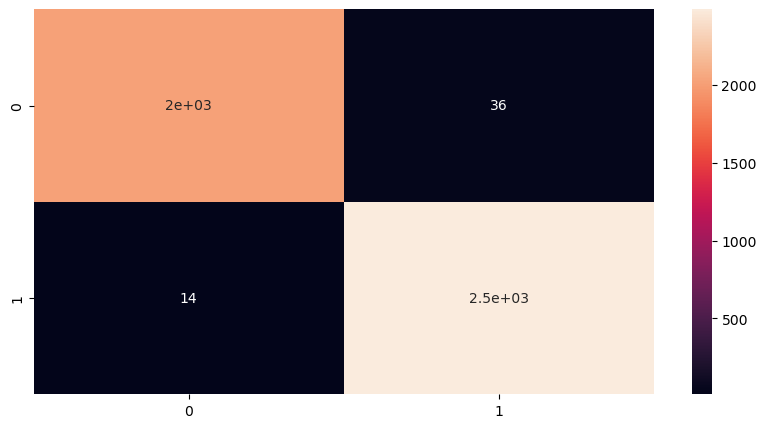

In [16]:
plt.figure(figsize=(10,5))
cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matrix,annot = True)
plt.savefig('Confusion_Matrix_Test.png')

In [17]:
# training
y_pred_train = model.predict( x_train)

In [18]:
# confusion matrix
cm = confusion_matrix(y_train, y_pred_train)
print(cm)
# classification report
cr = classification_report(y_train, y_pred_train)
print(cr)
# accuracy
accuracy = accuracy_score(y_train, y_pred_train)
print(accuracy)

[[6060   90]
 [  50 7438]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6150
           1       0.99      0.99      0.99      7488

    accuracy                           0.99     13638
   macro avg       0.99      0.99      0.99     13638
weighted avg       0.99      0.99      0.99     13638

0.9897345651855111


C:\Users\Payal Gunjal\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 800x600 with 0 Axes>

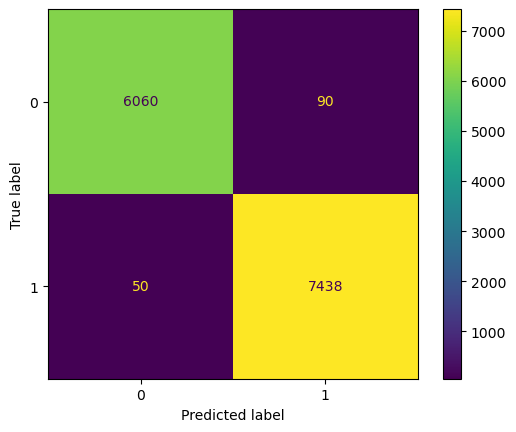

In [19]:
plt.figure(figsize=(8,6))
plot_confusion_matrix(model,x_train, y_train)
plt.savefig('CNF_Matrix_train.png')
plt.show()

In [20]:
TN = 6060
TP = 7438
FN = 50
FP = 90

In [21]:
TPR = TP / (TP + FN)
TPR

0.9933226495726496

In [22]:
TNR = TN / ( TN + FP )
TNR

0.9853658536585366

In [23]:
FPR = FP / (TN + FP )
FPR

0.014634146341463415

In [24]:
FNR = FN / (TP + FN )
FNR

0.006677350427350427

In [25]:
y.value_counts()

1    9985
0    8200
Name: Class, dtype: int64

In [26]:
df.shape[0]

18185

In [27]:
9985/18185

0.5490789111905416

In [28]:
8200/18185

0.45092108880945836

##  ROC

In [29]:
y_pred_train_prob = model.predict_proba(x_train)
y_pred_train_prob[:10]

array([[9.73971373e-01, 2.60286270e-02],
       [9.99999904e-01, 9.61270228e-08],
       [1.38339048e-04, 9.99861661e-01],
       [1.44283595e-06, 9.99998557e-01],
       [4.46132402e-03, 9.95538676e-01],
       [1.39001741e-04, 9.99860998e-01],
       [9.99976603e-01, 2.33972394e-05],
       [9.99999589e-01, 4.10823395e-07],
       [2.07697167e-04, 9.99792303e-01],
       [9.99997120e-01, 2.88025785e-06]])

In [30]:
y_train[:10]

13656    0
10304    0
9132     1
10024    1
1897     1
3380     1
14967    0
14291    0
5773     1
12164    0
Name: Class, dtype: int64

In [31]:
y_pred_train[:10]

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 0], dtype=int64)

In [32]:
fpr, tpr, thresh = roc_curve(y_train,y_pred_train_prob[:,1])

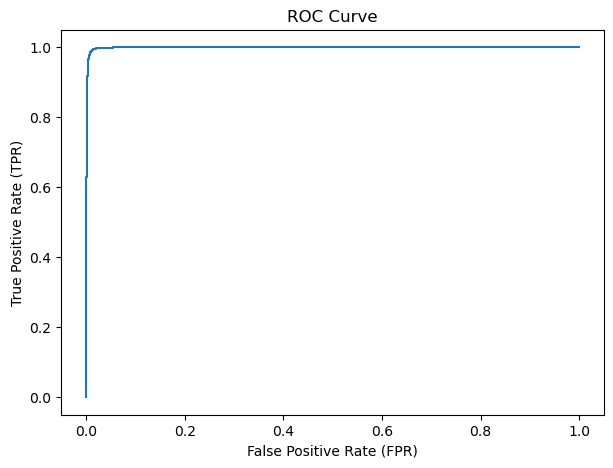

In [33]:
plt.figure(figsize=(7,5))
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title("ROC Curve")
plt.savefig("ROC_Curve.png")

In [34]:
# if we want TPR greater than 99.9%
index = np.where( tpr > 0.999 )
index

(array([214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226,
        227], dtype=int64),)

In [35]:
fpr[index]

array([0.04910569, 0.05203252, 0.05203252, 0.05528455, 0.05528455,
       0.05544715, 0.05544715, 0.06      , 0.06      , 0.06569106,
       0.06569106, 0.12780488, 0.12780488, 1.        ])

In [36]:
thresh[index]

array([8.13030384e-02, 6.87366440e-02, 6.87284209e-02, 5.82471839e-02,
       5.81526976e-02, 5.73513227e-02, 5.73044406e-02, 4.88708494e-02,
       4.81804509e-02, 3.94028165e-02, 3.88069470e-02, 7.22730924e-03,
       7.20690583e-03, 7.15482261e-10])

In [37]:
# selected thrld 3.88069470e-02 , bcz we want tpr >99.9%

In [38]:
test_array = np.array([[6801, 139.2, 64.5, 0.91, 8010, 94.34, 0.65, 337.2, 0.7434, 2.36]])
def get_pred_class(new_thr , new_observation):
    prob = new_observation[0][0]
    if prob >= new_thr:
        print("Class 0")
    else:
        print("Class 1")
new_thr = 0.038806947
new_observation = model.predict_proba(test_array)

C:\Users\Payal Gunjal\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [39]:
get_pred_class(new_thr, new_observation)

Class 0


In [46]:
with open("model.pkl","wb") as f:
    pickle.load(model,f)

TypeError: load() takes exactly 1 positional argument (2 given)